Stock market portfolio optimization is a process used to manage investments in a way that maximizes returns while minimizing risk. Here's a breakdown of the key concepts and steps involved:
Key Concepts:
1. Price Trends:

These are the general directions in which stock prices are moving over a period of time. Analyzing these trends helps in predicting future price movements.

2. Expected Returns:

This refers to the anticipated profit or loss from an investment. It's calculated based on historical data and is a key factor in deciding which stocks to include in a portfolio.

3. Volatility:

Volatility measures the degree of variation in a stock's price over time. Higher volatility means more risk, as the price can fluctuate widely.

4. Correlations:

Correlation measures how stocks move in relation to one another. A well-diversified portfolio includes stocks that are not highly correlated, meaning they do not all move in the same direction at the same time, reducing overall risk.

5. Modern Portfolio Theory (MPT):

This is a mathematical framework for assembling a portfolio of assets in a way that maximizes expected return for a given level of risk. MPT focuses on selecting stocks that, when combined, create a balanced and efficient portfolio.

6. Efficient Frontier:

The efficient frontier is a curve that represents the set of portfolios that offer the highest expected return for a given level of risk. Portfolios on this frontier are considered optimal.
7. Sharpe Ratio:

The Sharpe ratio is a measure of risk-adjusted return. It helps identify the portfolio that provides the best return for the level of risk taken. The higher the Sharpe ratio, the better the risk-adjusted return.

Steps in Portfolio Optimization:

1. Data Collection:

Collect historical and real-time stock market data to analyze trends, returns, volatility, and correlations between different stocks.

2. Analysis and Calculation:

Calculate expected returns, volatility, and correlations for the selected stocks.
Use these calculations to determine the optimal combination of stocks.

3. Constructing the Portfolio:

Apply Modern Portfolio Theory to select the best mix of stocks that maximizes returns while minimizing risk.
Plot the efficient frontier to visualize the optimal portfolios.

4. Optimization:

Identify the portfolio with the highest Sharpe ratio to ensure the best risk-adjusted return. Allocate investments according to the optimization results to achieve long-term investment goals.

Getting Started with Data Collection:
To begin optimizing a stock market portfolio, collect real-time stock market data. This is done using the yfinance API, which allows you to access financial data for various stocks. Retrieve data like historical prices, dividends, and more, which will be used in the analysis and optimization process. By analyzing this data, apply the principles of Modern Portfolio Theory to construct an efficient portfolio that aligns with investment goals.








Collecting data for some popular companies

In [1]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
# tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

tickers = ["NVDA.NE", "META", "TSLA", "INTC.SN"]

data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# reset index to bring Date into the columns for the melt function
data = data.reset_index()

# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())

In [2]:
stock_data = pd.read_csv("stock_data.csv")
stock_data.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-09-18 00:00:00+00:00,META,301.929535,302.549988,303.600006,297.799988,298.190002,14234200.0
1,2023-09-18 00:00:00+00:00,NVDA.NE,10.466874,10.470000,10.537500,10.092500,10.182500,789820.0
2,2023-09-18 00:00:00+00:00,TSLA,265.279999,265.279999,271.440002,263.760010,271.160004,101543300.0
3,2023-09-19 00:00:00+00:00,META,304.444397,305.070007,306.170013,299.809998,302.480011,15924400.0
4,2023-09-19 00:00:00+00:00,NVDA.NE,10.371901,10.375000,10.477500,10.257500,10.452500,310272.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [4]:
stock_data.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-09-18 00:00:00+00:00,META,301.929535,302.549988,303.600006,297.799988,298.190002,14234200.0
1,2023-09-18 00:00:00+00:00,NVDA.NE,10.466874,10.470000,10.537500,10.092500,10.182500,789820.0
2,2023-09-18 00:00:00+00:00,TSLA,265.279999,265.279999,271.440002,263.760010,271.160004,101543300.0
3,2023-09-19 00:00:00+00:00,META,304.444397,305.070007,306.170013,299.809998,302.480011,15924400.0
4,2023-09-19 00:00:00+00:00,NVDA.NE,10.371901,10.375000,10.477500,10.257500,10.452500,310272.0


looking at performance over time

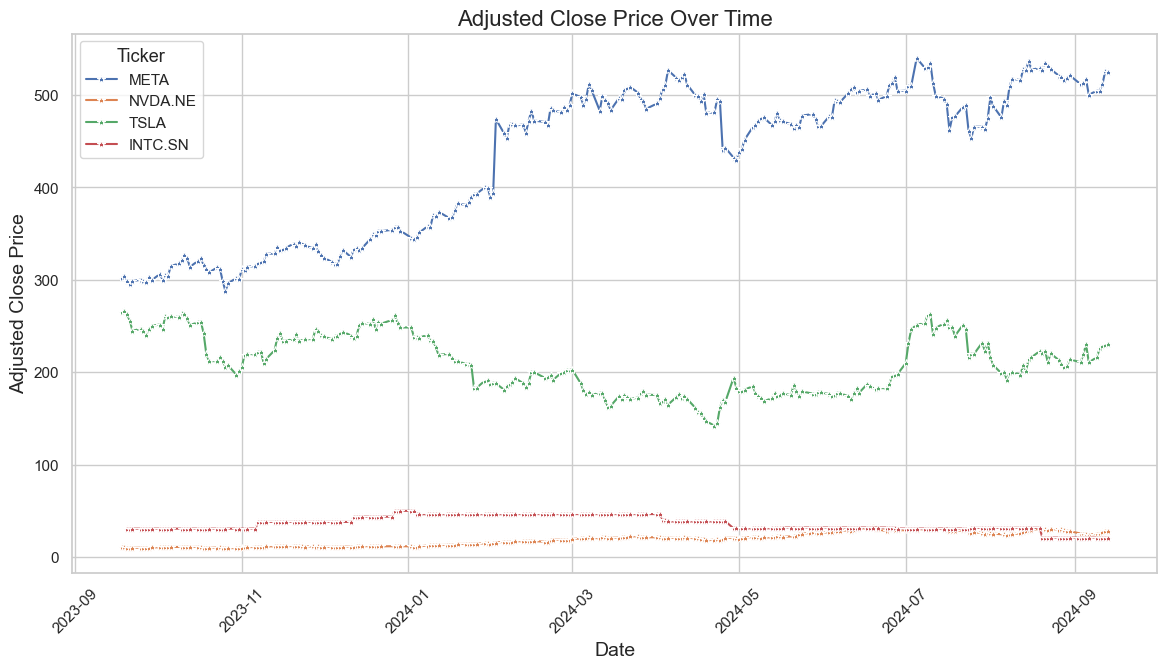

In [5]:
plt.figure(figsize= (14, 7))
sns.set(style= 'whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='*')

plt.title('Adjusted Close Price Over Time', fontsize= 16)
plt.xlabel('Date', fontsize= 14)
plt.ylabel('Adjusted Close Price', fontsize= 14)
plt.legend(title= 'Ticker', title_fontsize= '13', fontsize= '11')
plt.grid(True)

plt.xticks(rotation= 45)

plt.show()

Computing the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock

In [6]:
stock_data.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-09-18 00:00:00+00:00,META,301.929535,302.549988,303.600006,297.799988,298.190002,14234200.0
1,2023-09-18 00:00:00+00:00,NVDA.NE,10.466874,10.470000,10.537500,10.092500,10.182500,789820.0
2,2023-09-18 00:00:00+00:00,TSLA,265.279999,265.279999,271.440002,263.760010,271.160004,101543300.0
3,2023-09-19 00:00:00+00:00,META,304.444397,305.070007,306.170013,299.809998,302.480011,15924400.0
4,2023-09-19 00:00:00+00:00,NVDA.NE,10.371901,10.375000,10.477500,10.257500,10.452500,310272.0


In [7]:
stock_data.columns = stock_data.columns.str.strip()


In [8]:
stock_data.columns

Index(['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

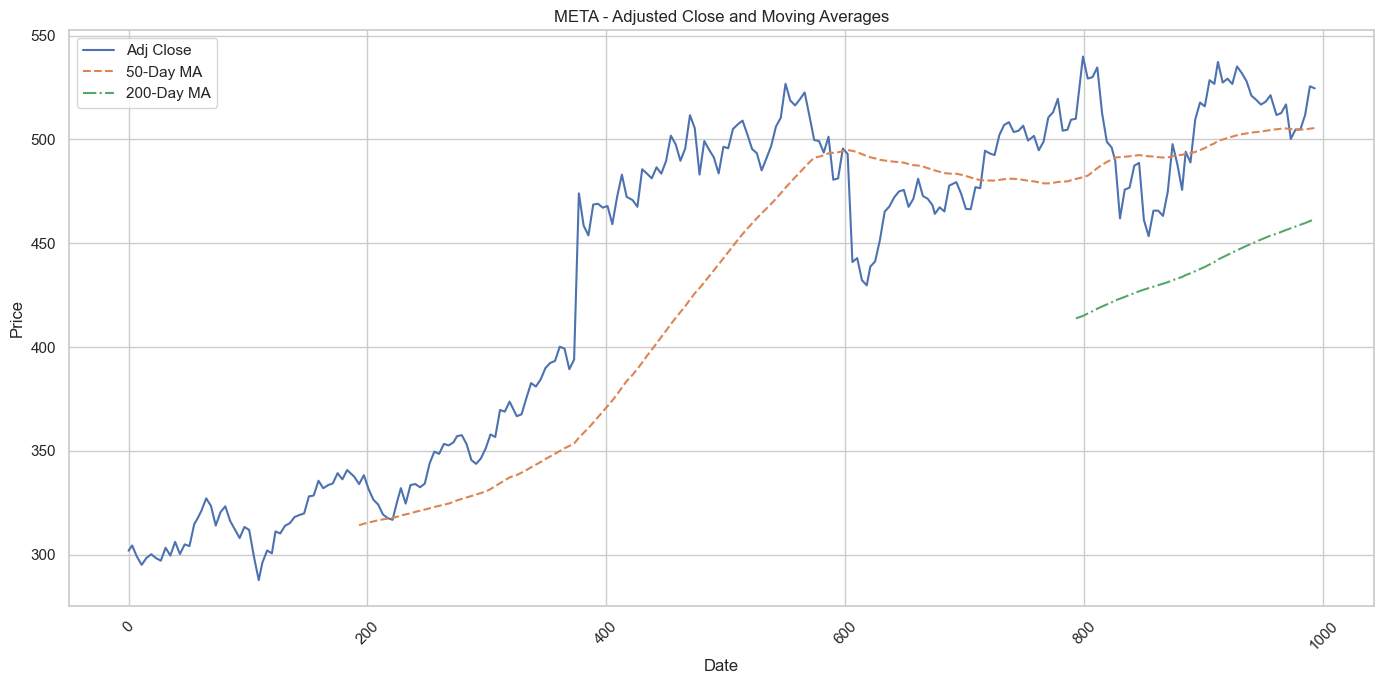

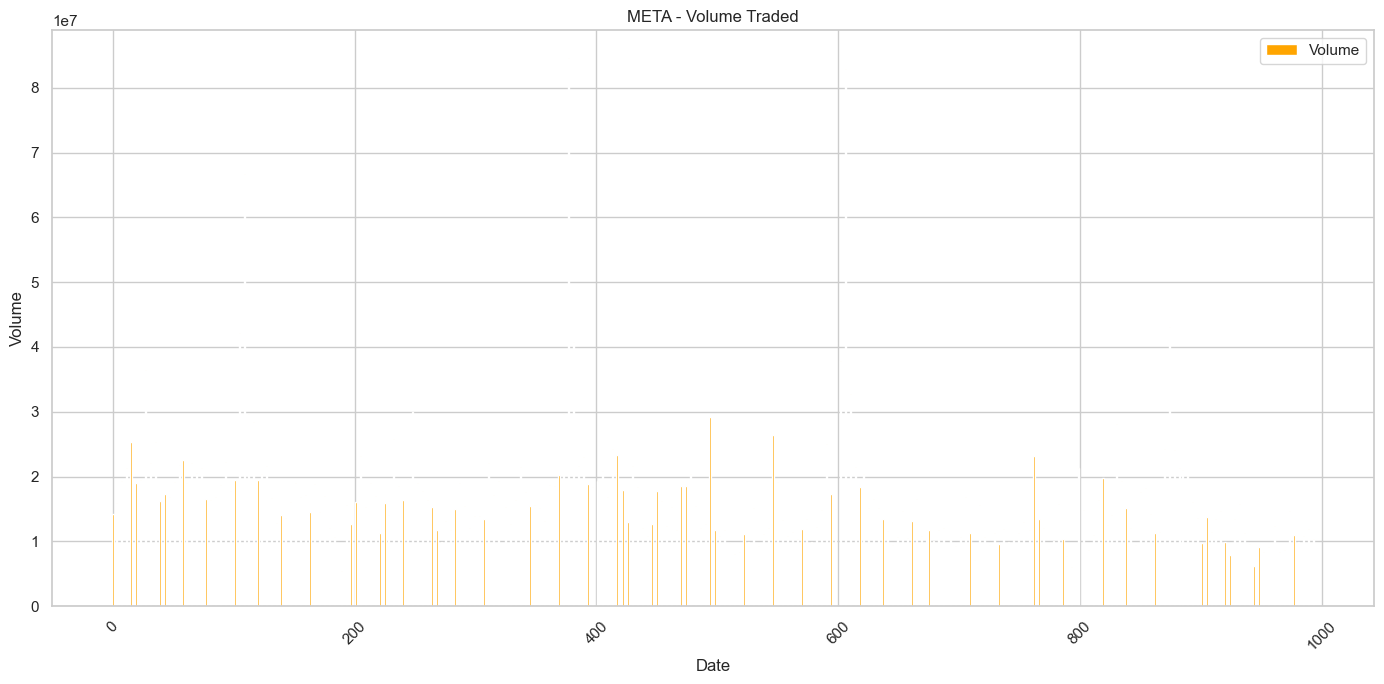

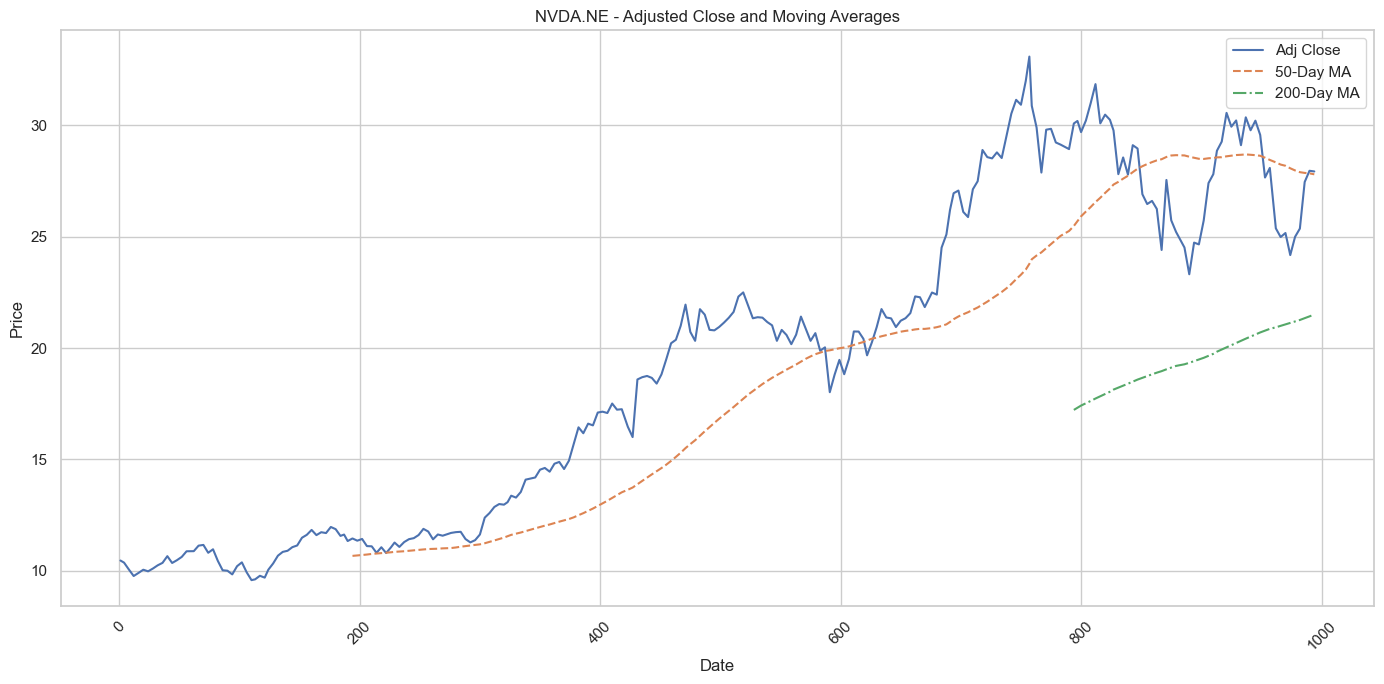

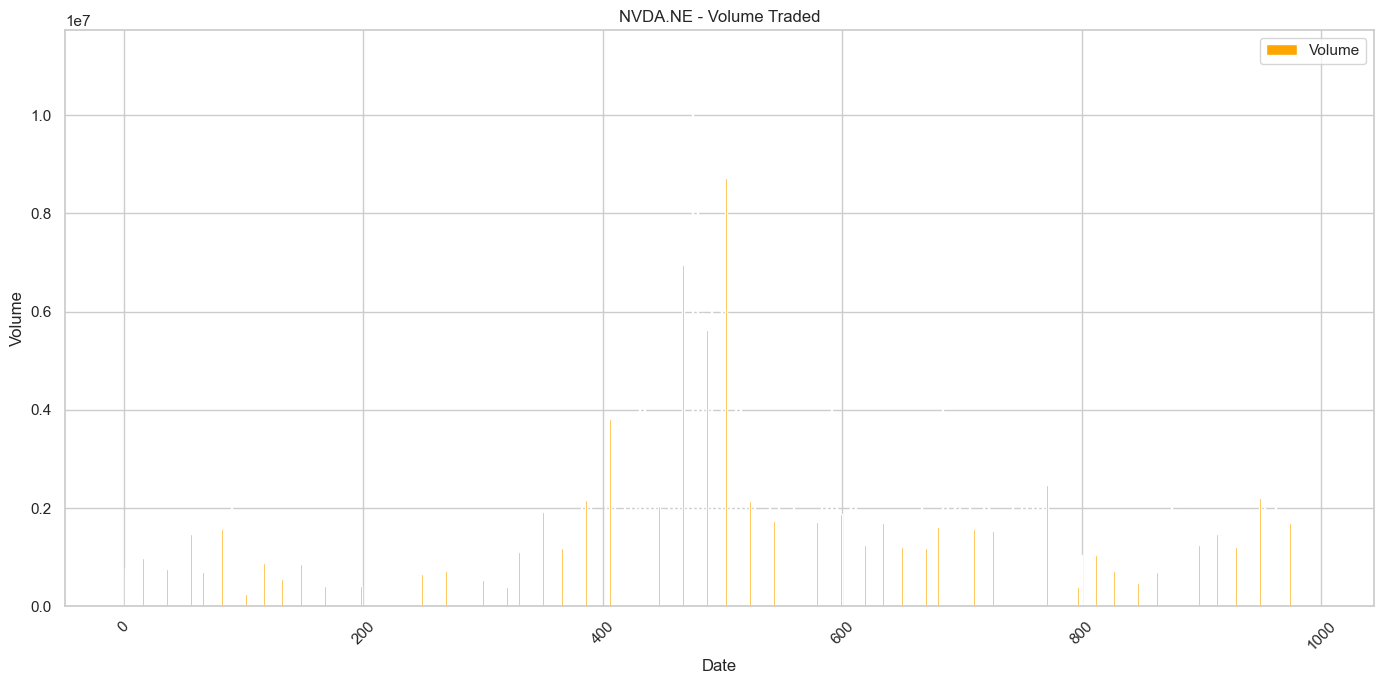

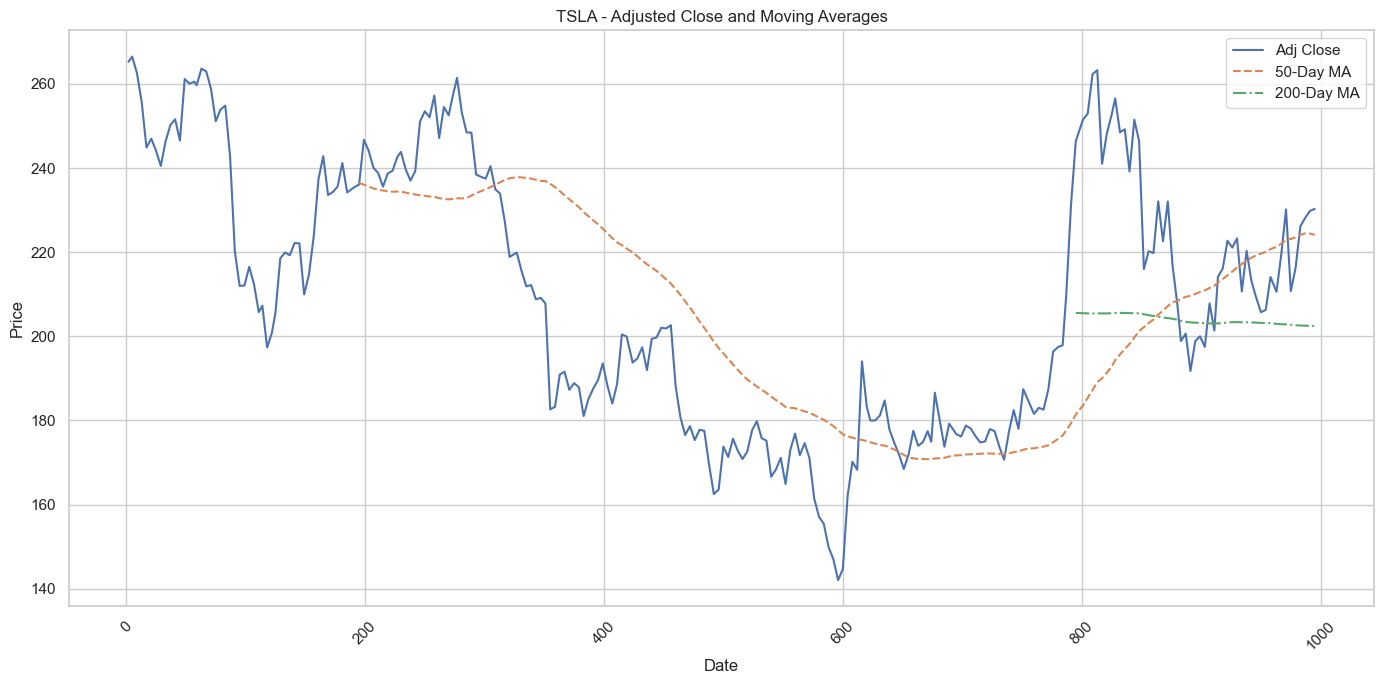

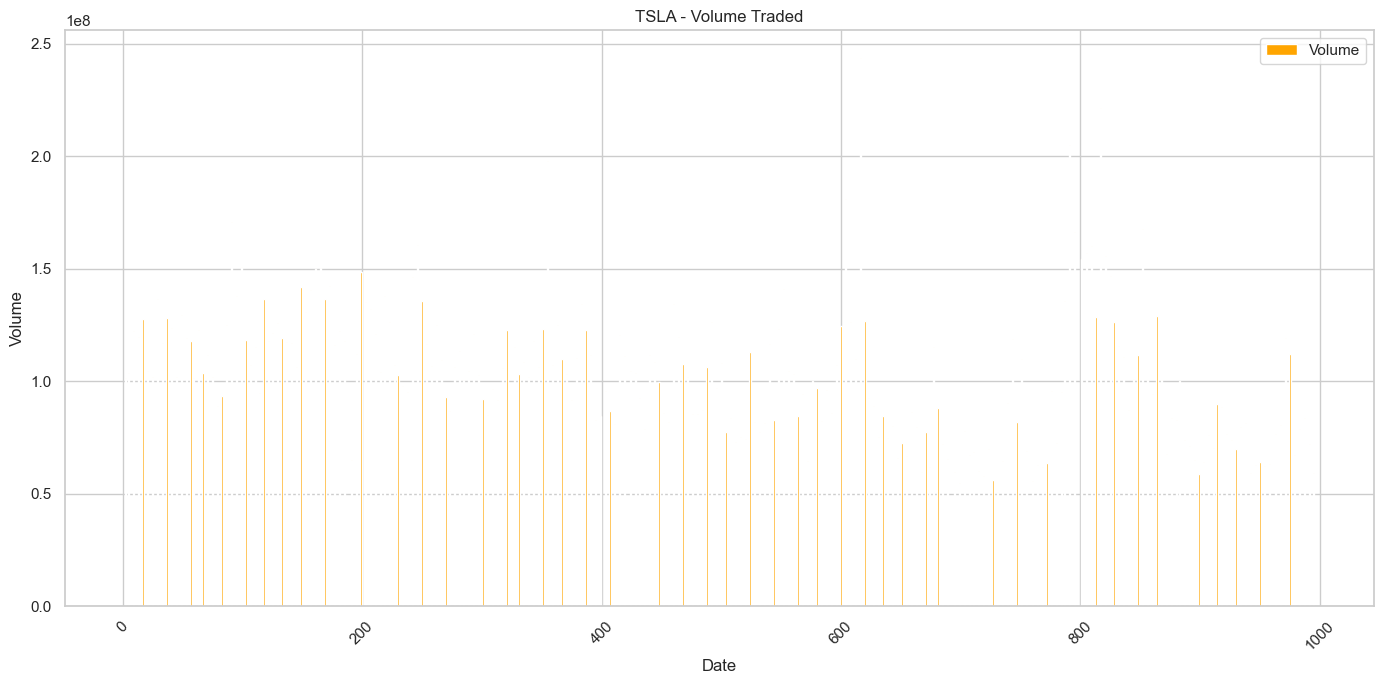

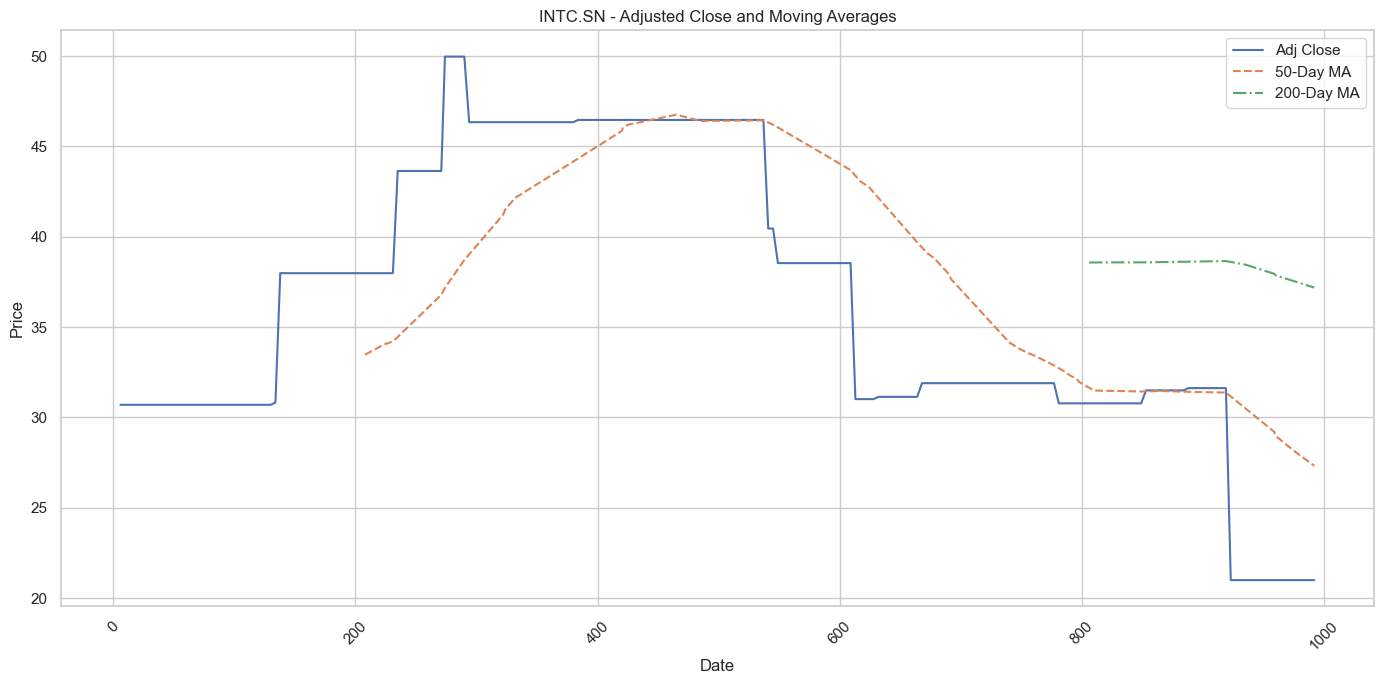

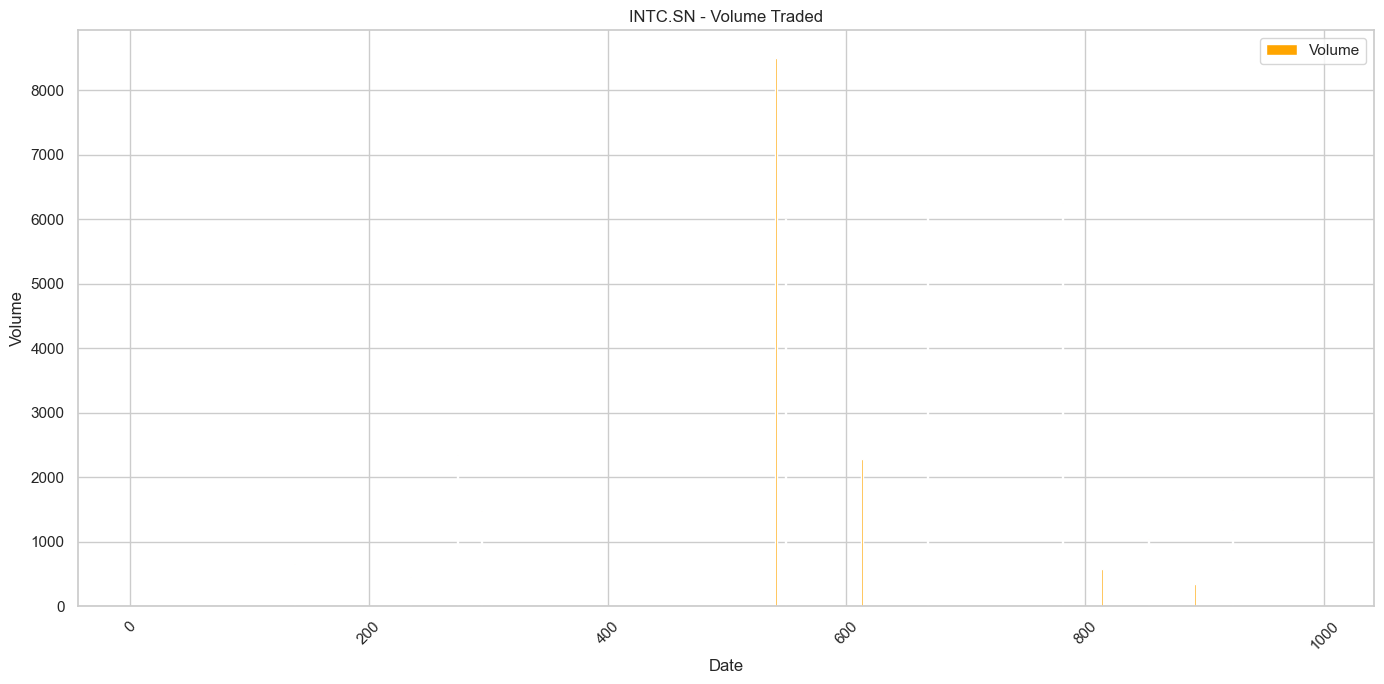

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

short_window = 50
long_window = 200

# Ensure 'Data' is parsed as a datetime
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    
    # Calculate Moving Averages
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()
    
    # Plot Adjusted Close and Moving Averages
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA', linestyle='--')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA', linestyle='-.')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot Volume Traded
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange', width=1)
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Now looking at the distribution of daily returns of these stocks

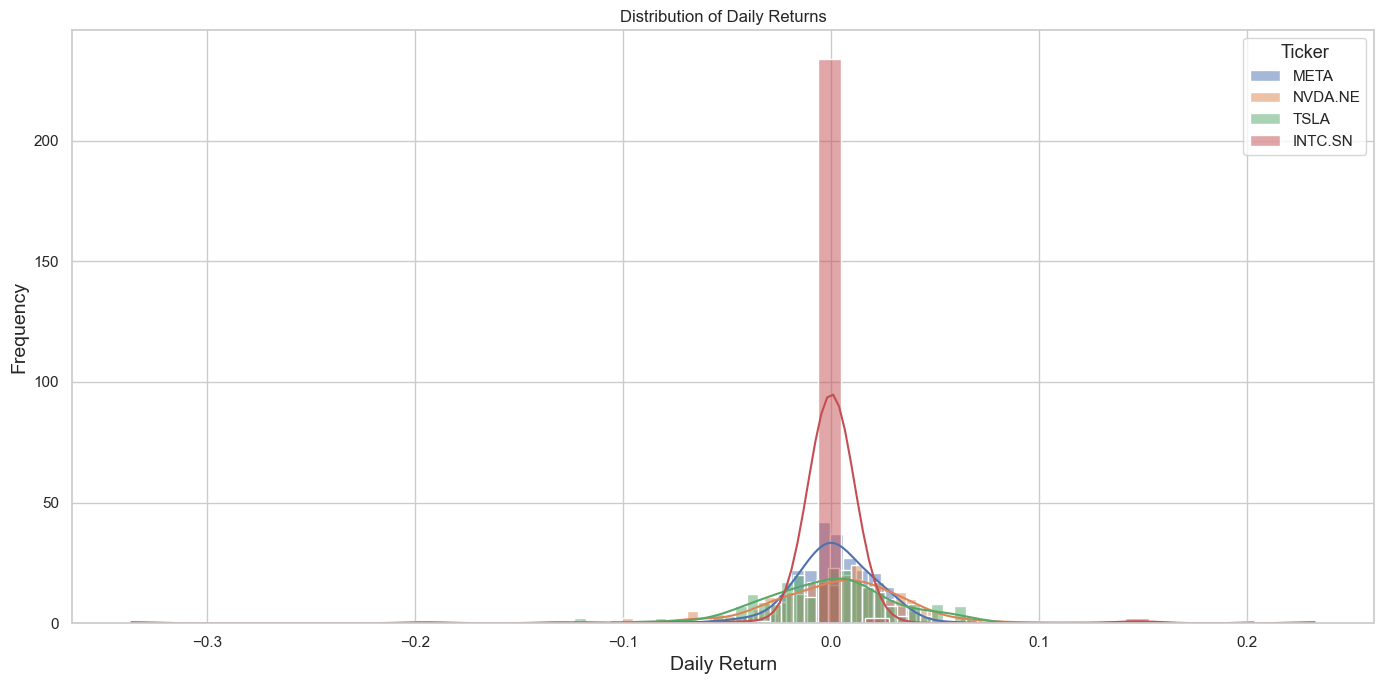

In [10]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize= (14,7))
sns.set_theme(style= 'whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins= 50, kde= True, label= ticker, alpha= 0.5)

plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return', fontsize= 14)
plt.ylabel('Frequency', fontsize= 14)
plt.legend(title= 'Ticker', title_fontsize= '13', fontsize= '11')
plt.grid(True)
plt.tight_layout()
plt.show()






The distributions are approximately normal, centered around zero, indicating that most daily returns are near the average return. However, the presence of tails on both sides represents occasional significant gains or losses.

The correlation matrix

In [11]:
stock_data.columns

Index(['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Daily Return'],
      dtype='object')

In [12]:
daily_returns = stock_data.pivot_table(index= 'Date', columns= 'Ticker', values= 'Daily Return')
daily_returns

Ticker,INTC.SN,META,NVDA.NE,TSLA
Date,,,,
2023-09-19 00:00:00+00:00,NaN,0.008329,-0.009074,0.004599
2023-09-20 00:00:00+00:00,NaN,-0.017701,-0.029638,-0.014672
2023-09-21 00:00:00+00:00,0.0,-0.013148,-0.029054,-0.026239
2023-09-22 00:00:00+00:00,0.0,0.011328,0.014067,-0.042315
2023-09-25 00:00:00+00:00,0.0,0.005851,0.014628,0.008616
...,...,...,...,...
2024-09-09 00:00:00+00:00,0.0,0.009035,0.033926,0.026290
2024-09-10 00:00:00+00:00,0.0,0.000000,0.014806,0.045776
2024-09-11 00:00:00+00:00,0.0,0.013946,0.082413,0.008666


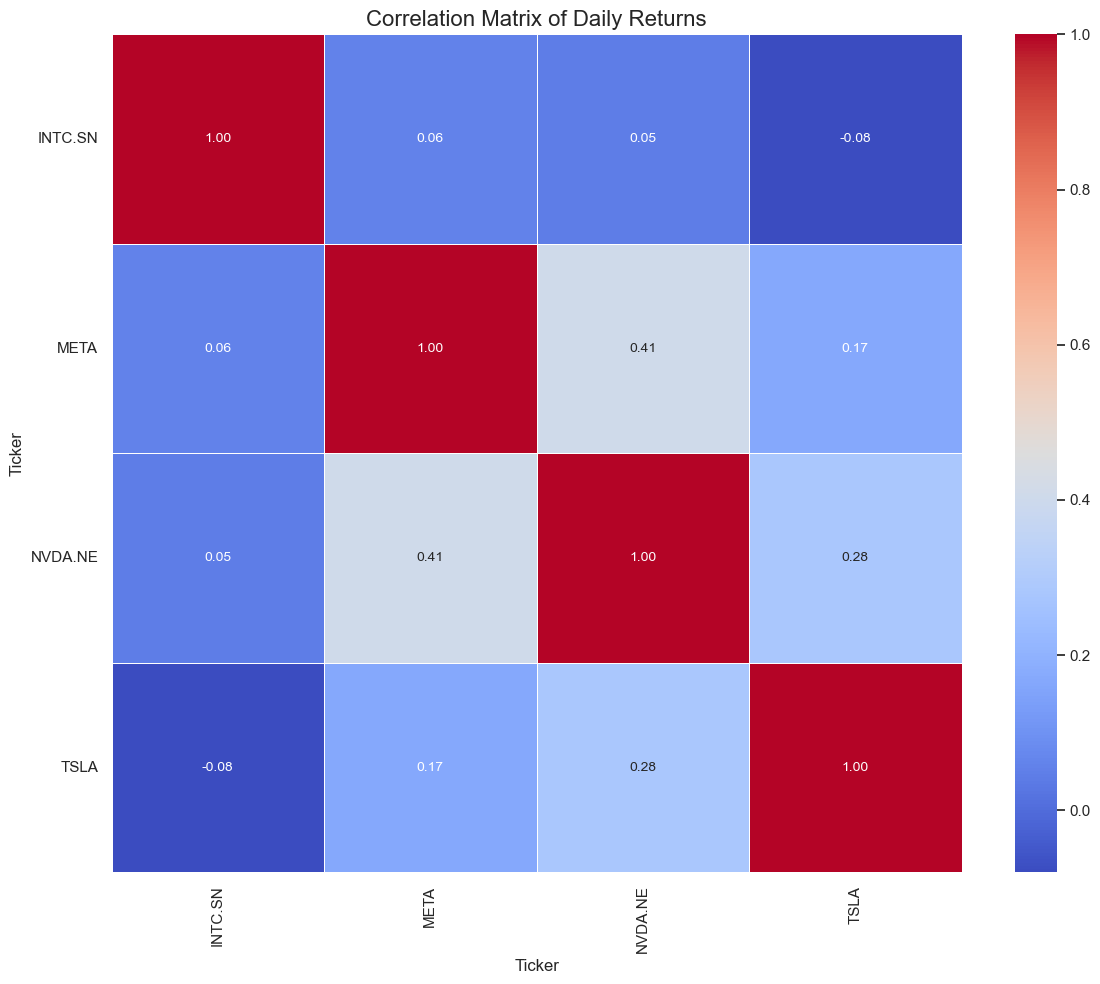

In [13]:
correlation_matrix = daily_returns.corr()
plt.figure(figsize= (12,10))
sns.set(style= 'whitegrid')

sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm', linewidths= .5, fmt= '.2f', annot_kws= {"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The correlation matrix shows the relationships between the daily returns of INTC.SN, META, NVDA.NE, and TSLA:

High correlation: META and NVDA.NE (0.41), indicating moderate similarity in their daily return movements.

Weak correlations: TSLA with META (0.17) and NVDA.NE (0.28), suggesting minimal relationship in their movements.

Negligible or negative correlation: INTC.SN with all others, particularly TSLA (-0.08), indicating independence in their returns.

This suggests that INTC.SN may provide diversification benefits, while META and NVDA.NE have some interconnected performance trends.

Portfolio Optimization


Using Modern Portfolio Theory, construct a portfolio by balancing risk and return:

1. Calculate the expected returns and volatility for each stock.

2. Generate a series of random portfolios to identify the efficient frontier.

3. Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

In [14]:
daily_returns.head()

Ticker,INTC.SN,META,NVDA.NE,TSLA
Date,,,,
2023-09-19 00:00:00+00:00,NaN,0.008329,-0.009074,0.004599
2023-09-20 00:00:00+00:00,NaN,-0.017701,-0.029638,-0.014672
2023-09-21 00:00:00+00:00,0.0,-0.013148,-0.029054,-0.026239
2023-09-22 00:00:00+00:00,0.0,0.011328,0.014067,-0.042315
2023-09-25 00:00:00+00:00,0.0,0.005851,0.014628,0.008616


calculate expected daily returns and volatility of each stock

In [15]:
import numpy as np

# Annualize returns
expected = daily_returns.mean()*252

# Annualize volatility
volatility = daily_returns.std()*np.sqrt(252)

stock_stats =  pd.DataFrame({
    'Expected Return': expected,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
INTC.SN,-0.233561,0.532852
META,0.625155,0.367781
NVDA.NE,1.125672,0.514716
TSLA,0.003874,0.543685


The table presents expected returns and volatility for four stocks:

INTC.SN: High risk with an expected loss (-23.36%).

META: Moderate risk with strong potential gain (62.52%).

NVDA.NE: High risk but very high expected gain (112.57%).

TSLA: High risk with minimal expected return (0.39%).

META and NVDA.NE are promising but differ in risk levels, while INTC.SN and TSLA show less favorable prospects.






Next:

Generate a large number of random portfolio weights.

Calculate the expected return and volatility for each portfolio.

Plot these portfolios to visualize the efficient frontier.

Generating the random portfolios and plotting the efficient frontier:



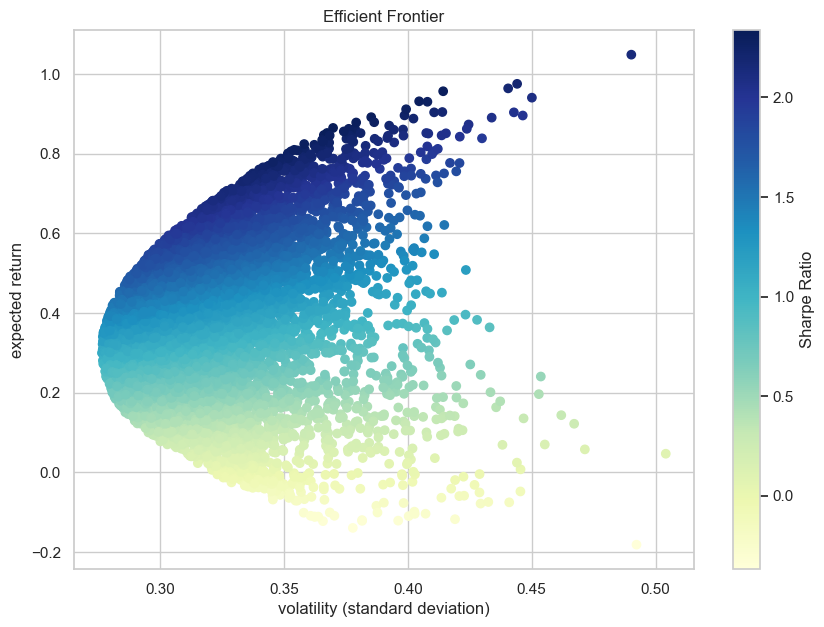

In [19]:
# calculating portfolio perfomance
def port_per(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store results
results = np.zeros((3, num_portfolios))

# Annualized covariance matrix
cov_matrix = daily_returns.cov()*252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = port_per(weights, expected, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize= (10,7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('volatility (standard deviation)')
plt.ylabel('expected return')
plt.colorbar(label= 'Sharpe Ratio')
plt.grid(True)
plt.show()





Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.



Identify portfolio with the maximum sharpe ratio

In [20]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.8646506152905009, 0.3698223695278008, 2.3380159950694983)

The portfolio with the maximum Sharpe ratio has the following characteristics:

Expected Return: ~86.47%

Volatility: ~36.98%

Sharpe Ratio: ~2.34


identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:

In [24]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = port_per(weights, expected, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,META,0.452317
1,NVDA.NE,0.018038
2,TSLA,0.013955
3,INTC.SN,0.515690


The output shows a diversified portfolio with the following allocations:

META	45.23%

NVDA.NE	1.80%

TSLA	1.40%

INTC.SN	51.57%

INTC.SN has the highest allocation, which indicates its significant contribution to the portfolio’s performance, while TSLA has the smallest allocation. 

